In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import sys
sys.path.append('c:/Users/tomas/Documents/Programación/Github/Patricionog/Modulio/Readmes')
import Appio as ap
import Archivio as ac
import Databasio as bd
import Datetimio as dt
import Dictio as dc
import Excelio as ex
import Footio as ft
import Foragio as fg
import Framio as fr
import Graphio as gr
import Highlightio as hg
import Inputio as ip
import Listio as ls
import Mathio as mt
import Notio as nt
import Numbio as nb
import Numpio as nm
import Stringio as st
import Timio as tm
import Tkintio as tn
import Toolio as to

import statsmodels.api as sm
from scipy import stats

Los métodos robustos disminuyen el grado en que los resultados pueden verse influenciados por violaciones de los supuestos estadísticos clásicos.

In [197]:
# Cargar df.
df = pd.read_excel('J:/My Drive/Experimento/Plantillas finales/1. Generales - Original.xlsx')  

In [198]:
# Definir variables.
Variables_Independientes = ['genero',
            'edad',
            #'nacionalidad',
            #'provincia',
            #'e_social',
            #'niv_educativo',
            'voto_2019',
            #'voto_PASO_2023',
            #'candidato_PASO_2023',
            'autopercep_izqder',
            'autopercep_conpro',
            'autopercep_perantiper',
            'indice_positividad',
            #'massa_ip_izqder',
            #'massa_ip_conpro',
            #'bullrich_ip_izqder',
            #'bullrich_ip_conpro',
            #'schiaretti_ip_izqder',
            #'schiaretti_ip_conpro',
            #'milei_ip_izqder',
            #'milei_ip_conpro',
            #'bregman_ip_izqder',
            #'bregman_ip_conpro',
            'indice_progresismo',
            'indice_conservadurismo'
            ]
Variables_Dependientes = ['cambio_op_con', 'cambio_op_pro', 
                          'cambio_op_con_izq', 'cambio_op_con_der', 'cambio_op_pro_izq', 'cambio_op_pro_der',]

In [199]:
# Rellenar valores NaN con 0 para todo el DataFrame.
df.fillna(0, inplace=True)

In [200]:
# Cortar df.
df = df[Variables_Dependientes + Variables_Independientes]

In [201]:
for Column in Variables_Independientes:
    if df[Column].dtype == 'object':
        df = fr.Create_Dummy_Variables(df, Column, Drop_First = False, Group_Others = True, Remove_Others = False, 
                                    Threshold = 0.05, Name_Other_Column = f"{Column}_Others", Name_Columns_Style = None, Separator=None)

In [202]:
# Object to numeric df.
def Convert_Object_Columns_In_Numerics(df):
    # Convertir columnas booleanas a numéricas (0 y 1).
    for Column in df.columns:
        if df[Column].dtype == 'bool':
            df[Column] = df[Column].astype(int)
    
    return df

df = Convert_Object_Columns_In_Numerics(df)

In [203]:
# Redefinir las variables independientes.
Variables_Independientes = [Column for Column in df.columns if Column not in Variables_Dependientes]

In [204]:
# Generate a list of variables with p-value less than 0.05.
def Robust_Regression(df, V_Ind, V_Dep, Summary = False):

    # Definir la variable dependiente y las independientes.
    Y = df[V_Dep]
    X = df[V_Ind]  

    # Añadir constante para el término independiente.
    X = sm.add_constant(X)

    # Ajustar el modelo de regresión robusta usando Huber.
    Model = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
    Results = Model.fit()

    # Imprimir resultados.
    if Summary:
        print(Results.summary())

    # Generate a list of variables with p-value less than 0.05.
    Significant_Variables = Results.pvalues[Results.pvalues < 0.05].index.tolist()

    return Significant_Variables

In [205]:
def Check_Assumptions(DataFrame: pd.DataFrame, V_Ind: list, V_Dep: list):

    """Check the assumptions of linear regression and print test results."""
    
    Y = DataFrame[V_Dep]
    X = DataFrame[V_Ind]
    
    X = sm.add_constant(X)
    Model = sm.OLS(Y, X).fit()
    Residuals = Model.resid

    # 1. Linearity
    plt.figure(figsize=(12, 6))
    
    # Residuals vs Fitted Values
    plt.subplot(1, 2, 1)
    plt.scatter(Model.fittedvalues, Residuals)
    plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
    plt.title('Linearity Check: Residuals vs Fitted')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')

    # 2. Homoscedasticity
    plt.subplot(1, 2, 2)
    sns.histplot(Residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')

    plt.tight_layout()
    plt.show()

    # 3. Heteroscedasticity Test - Breusch-Pagan
    BP_Test = sm.stats.diagnostic.het_breuschpagan(Residuals, Model.model.exog)
    BP_Results = pd.DataFrame({
        'Test Statistic': [BP_Test[0]],
        'p-value': [BP_Test[1]]
    })

    print("Breusch-Pagan Test for Heteroscedasticity:")
    print(BP_Results.to_string(index=False))

    # 4. Normality Test - Shapiro-Wilk
    Shapiro_Test = stats.shapiro(Residuals)
    Shapiro_Results = pd.DataFrame({
        'Test Statistic': [Shapiro_Test.statistic],
        'p-value': [Shapiro_Test.pvalue]
    })

    print("\nShapiro-Wilk Test for Normality of Residuals:")
    print(Shapiro_Results.to_string(index=False))

----------------------------------------------------------------
Variable dependiente: cambio_op_con.
----------------------------------------------------------------
Variables significativas:
Variable: indice_conservadurismo


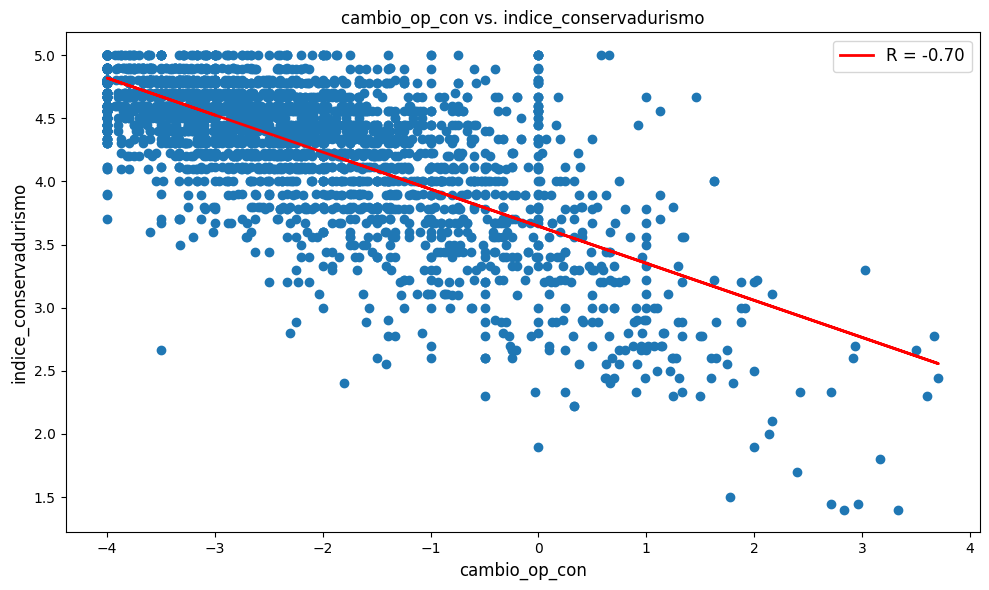

Variable: genero_femenino
Variable: genero_masculino
Variable: genero_Others
Variable: voto_2019_Alberto Fernandez
Variable: voto_2019_Mauricio Macri
Variable: voto_2019_Nicolás Del Caño
Variable: voto_2019_no vote
Variable: voto_2019_Others
----------------------------------------------------------------
Variable dependiente: cambio_op_pro.
----------------------------------------------------------------
Variables significativas:
Variable: autopercep_perantiper


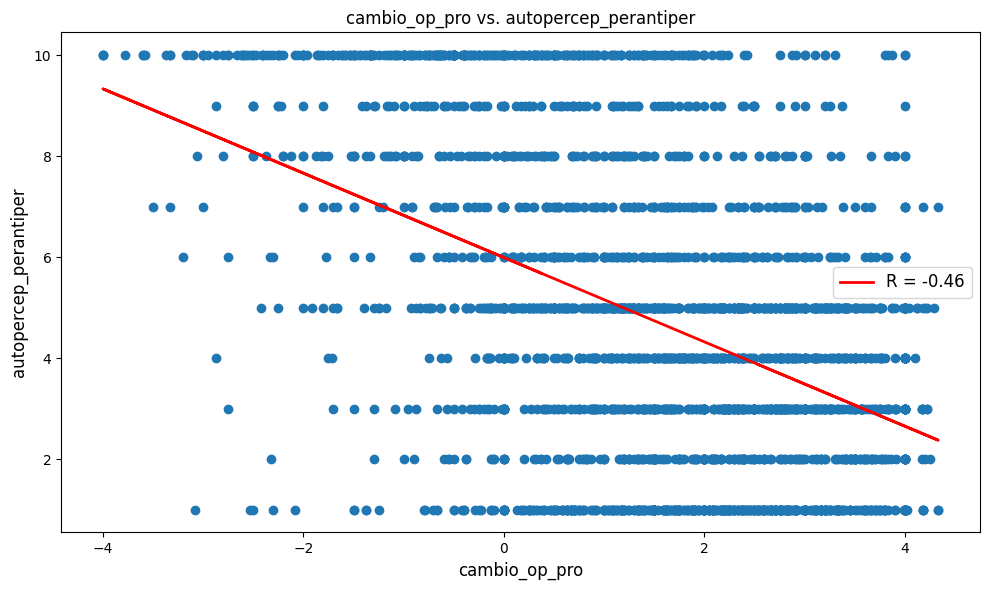

Variable: indice_positividad


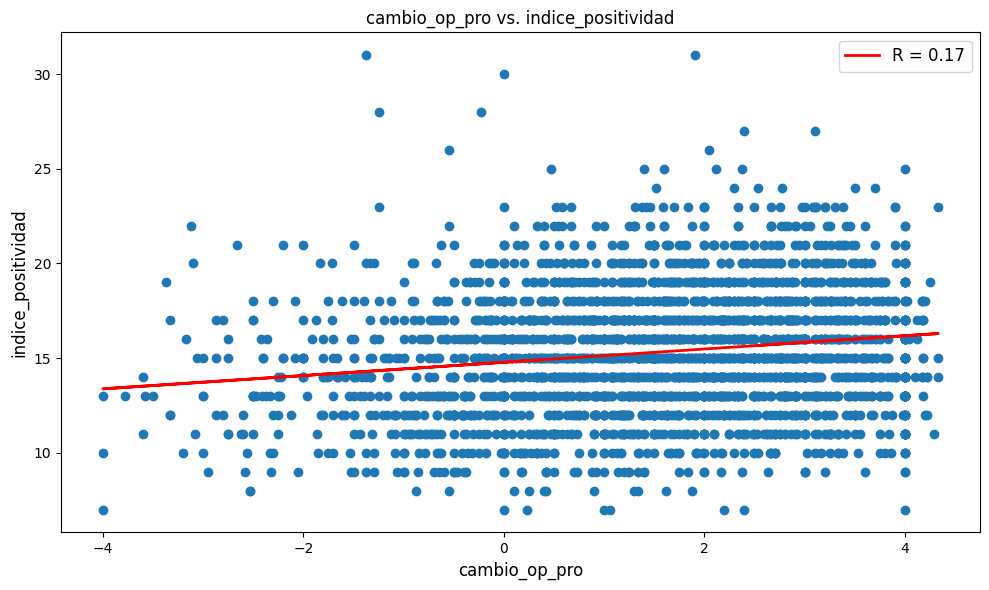

Variable: indice_progresismo


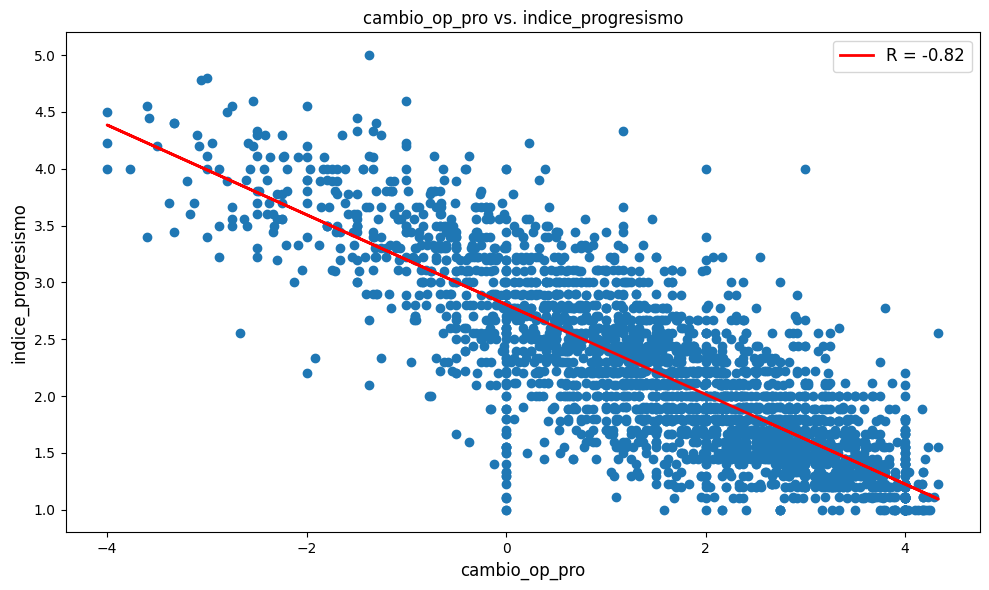

Variable: genero_femenino
Variable: genero_masculino
Variable: genero_Others
Variable: voto_2019_Alberto Fernandez
Variable: voto_2019_Mauricio Macri
Variable: voto_2019_Nicolás Del Caño
Variable: voto_2019_no vote
Variable: voto_2019_Others
----------------------------------------------------------------
Variable dependiente: cambio_op_con_izq.
----------------------------------------------------------------
Variables significativas:
Variable: indice_conservadurismo


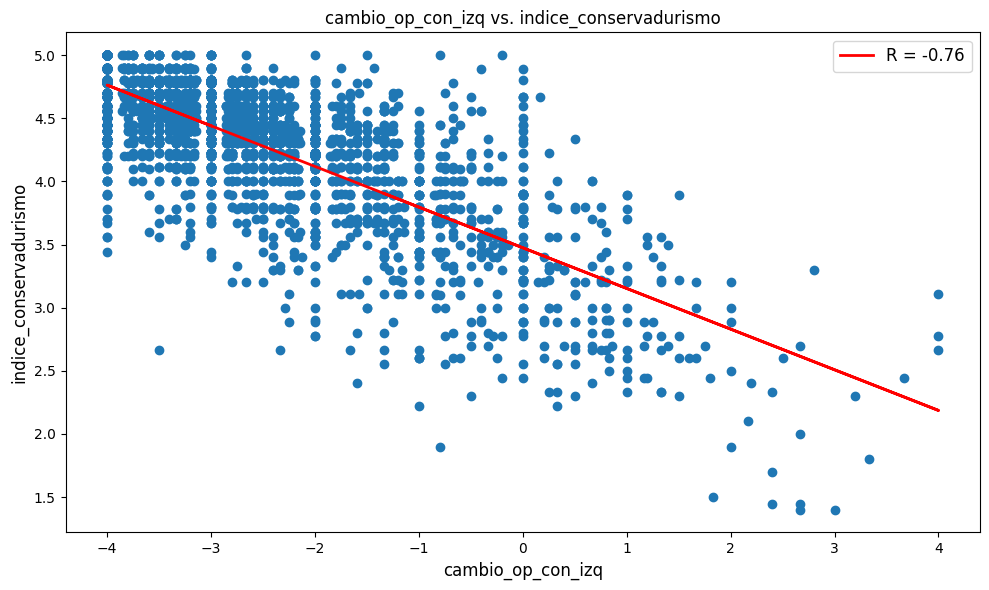

Variable: genero_femenino
Variable: genero_masculino
Variable: genero_Others
Variable: voto_2019_Alberto Fernandez
Variable: voto_2019_Mauricio Macri
Variable: voto_2019_Nicolás Del Caño
Variable: voto_2019_no vote
Variable: voto_2019_Others
----------------------------------------------------------------
Variable dependiente: cambio_op_con_der.
----------------------------------------------------------------
Variables significativas:
Variable: indice_conservadurismo


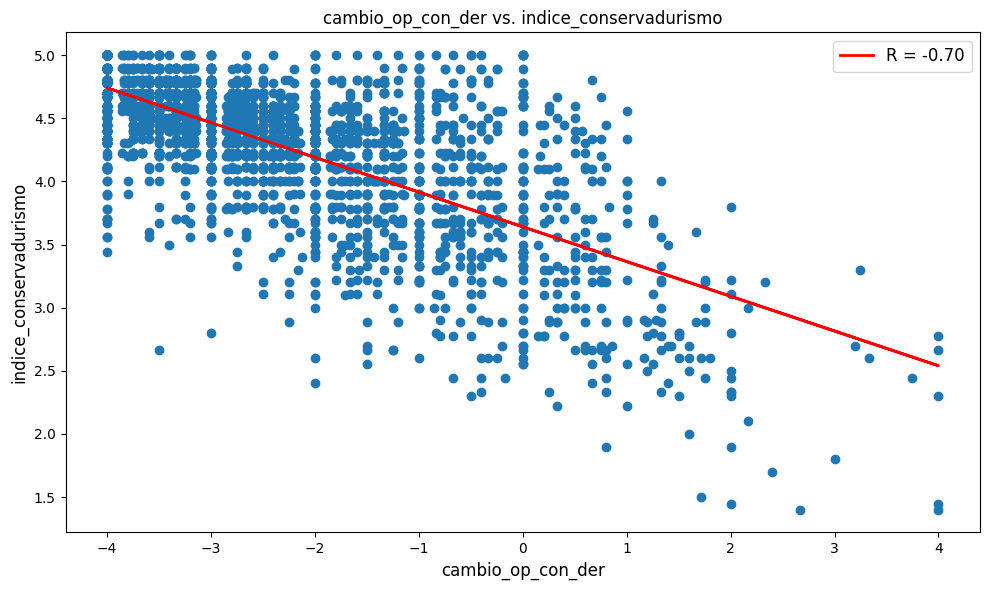

Variable: genero_femenino
Variable: genero_masculino
Variable: genero_Others
Variable: voto_2019_Alberto Fernandez
Variable: voto_2019_Mauricio Macri
Variable: voto_2019_Nicolás Del Caño
Variable: voto_2019_no vote
Variable: voto_2019_Others
----------------------------------------------------------------
Variable dependiente: cambio_op_pro_izq.
----------------------------------------------------------------
Variables significativas:
Variable: indice_progresismo


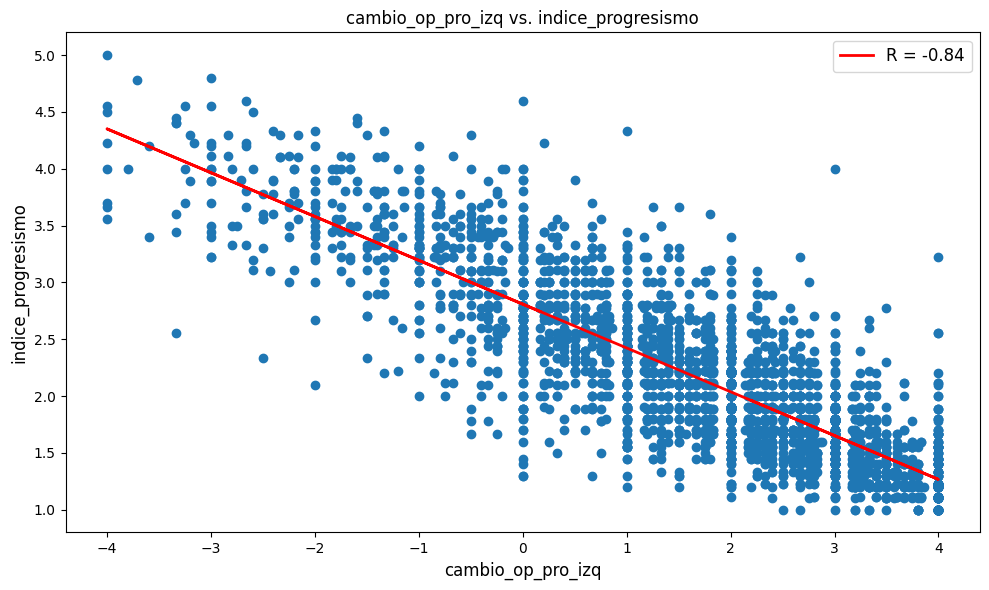

Variable: genero_femenino
Variable: genero_masculino
Variable: genero_Others
Variable: voto_2019_Alberto Fernandez
Variable: voto_2019_Mauricio Macri
Variable: voto_2019_Nicolás Del Caño
Variable: voto_2019_no vote
Variable: voto_2019_Others
----------------------------------------------------------------
Variable dependiente: cambio_op_pro_der.
----------------------------------------------------------------
Variables significativas:
Variable: indice_progresismo


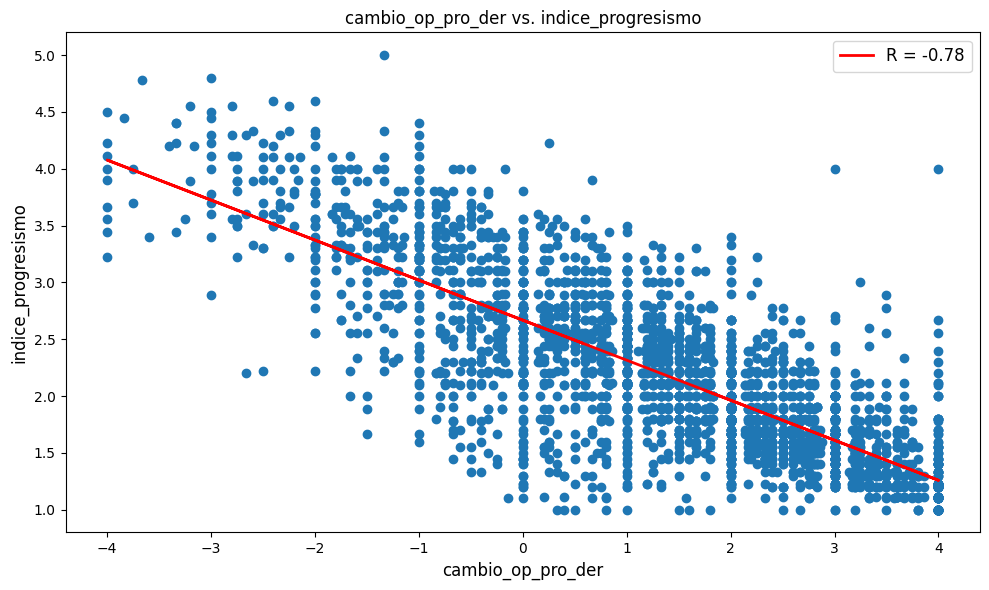

Variable: genero_femenino
Variable: genero_masculino
Variable: genero_Others
Variable: voto_2019_Alberto Fernandez
Variable: voto_2019_Mauricio Macri
Variable: voto_2019_Nicolás Del Caño
Variable: voto_2019_no vote
Variable: voto_2019_Others


In [206]:
for Variable_Dependiente in Variables_Dependientes:

    V_Dependientes_Para_Comparar = Variables_Independientes

    print('----------------------------------------------------------------')
    print(f'Variable dependiente: {Variable_Dependiente}.')
    print('----------------------------------------------------------------')

    Significativas = Robust_Regression(df, Variables_Independientes, Variable_Dependiente)

    if 'const' in Significativas:
        Significativas.remove('const')

    # Check_Assumptions(df, V_Dependientes_Para_Comparar, Variable_Dependiente)

    while sorted(Significativas) != sorted(V_Dependientes_Para_Comparar):
        V_Dependientes_Para_Comparar = Significativas
        Significativas = Robust_Regression(df, V_Dependientes_Para_Comparar, Variable_Dependiente)

        if 'const' in Significativas:
            Significativas.remove('const')

    print(f'Variables significativas:')
    for Variable in Significativas:
        print(f'Variable: {Variable}')
        if sorted(list(df[Variable].unique())) != [0, 1]:
            gr.Create_Scatter_Plot(X = df[Variable_Dependiente], Y = df[Variable], X_Label = Variable_Dependiente, Y_Label = Variable)